# TP Portfolio allocation : Covariance Cleaning
## Team : Marouane BATTACH; Ethan Setrouk; Paul Augis; Badre Mhiouah; Djoman Danho

### Librairies


In [5]:
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import average, leaves_list, dendrogram, fcluster
from scipy.spatial.distance import squareform

### Data

In [6]:
df = pd.read_csv('russell1000.csv')
df.set_index('index',inplace=True)
df.dropna(axis=1,inplace=True)
df = df.iloc[0:200,0:100]

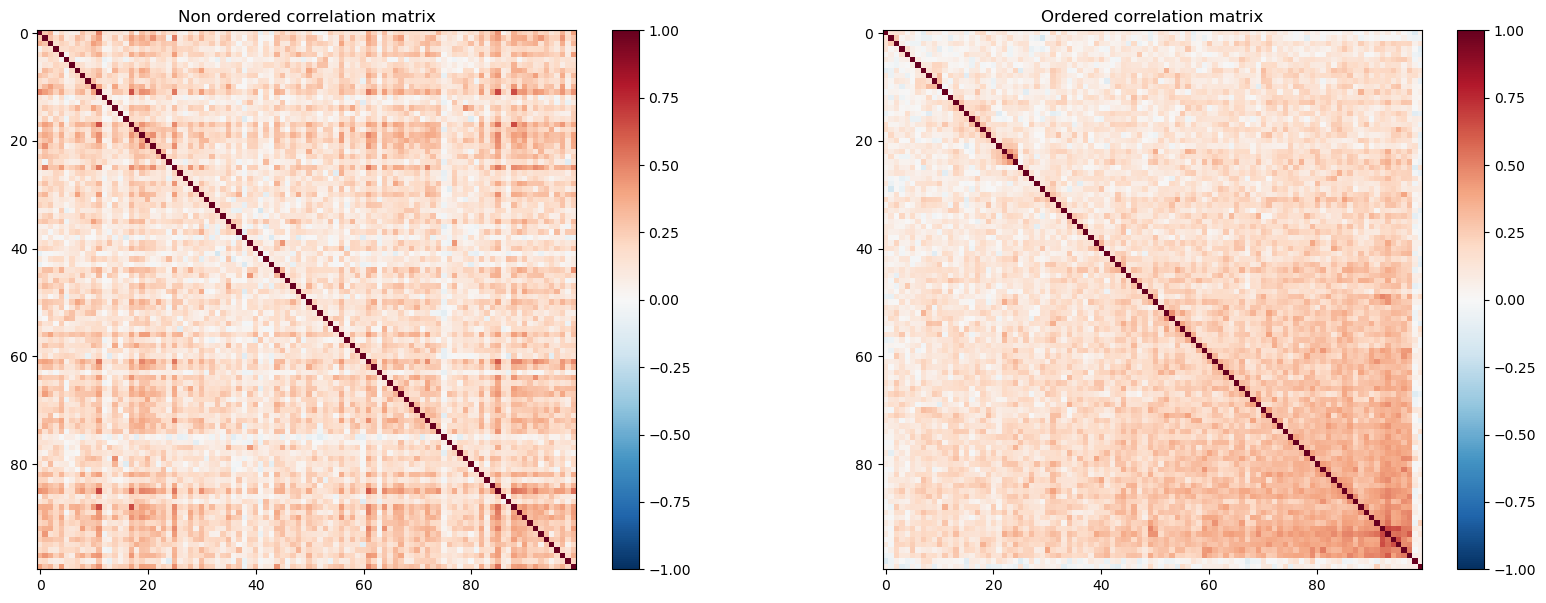

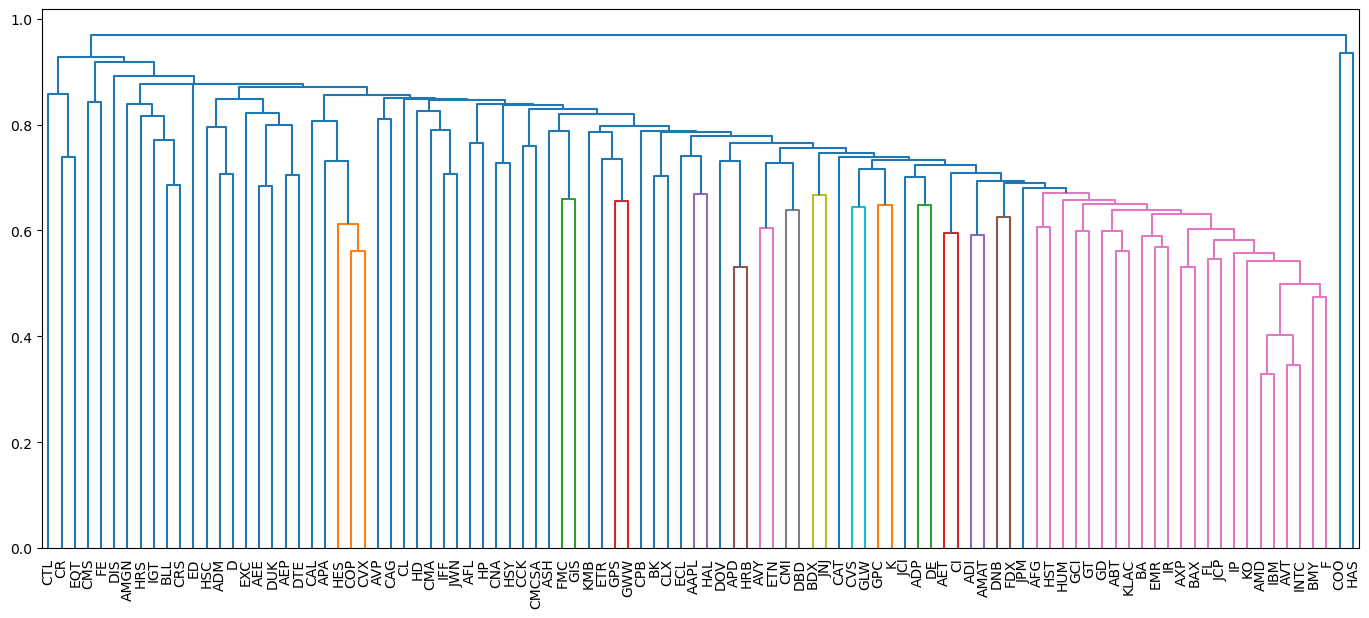

In [7]:
distance = 1 - df.corr()

avg  = average(squareform(distance))
ordered_stocks = leaves_list(avg)

df_ord = df[df.columns[ordered_stocks]]

cor = df_ord.corr()

plt.subplots(1,2,figsize=(20,7))

plt.subplot(121)
plt.imshow(df.corr(),cmap='RdBu_r',vmin=-1,vmax=1,origin='upper')
plt.colorbar()
plt.title('Non ordered correlation matrix')

plt.subplot(122)
plt.imshow(cor,cmap='RdBu_r',vmin=-1,vmax=1,origin='upper')
plt.colorbar()
plt.title('Ordered correlation matrix')


plt.figure(figsize=(17,7))
dendrogram(avg,labels=df.columns,leaf_font_size=10,orientation='top',leaf_rotation=90)
plt.show()

We have displayed above the correlation matrix ordered by distance according to the dendogram.

### The Regularized Correlation Matrix

To obtain the filtered correlation matrix, we cluster each asset with a distance related to the correlation between each asset and then we replace the correlation between two assets by the average correlation of the cluster.

We defined the threshold (=0.75) when the distance between the clusters increases significantly.

Text(0.5, 1.0, 'Filtered correlation matrix')

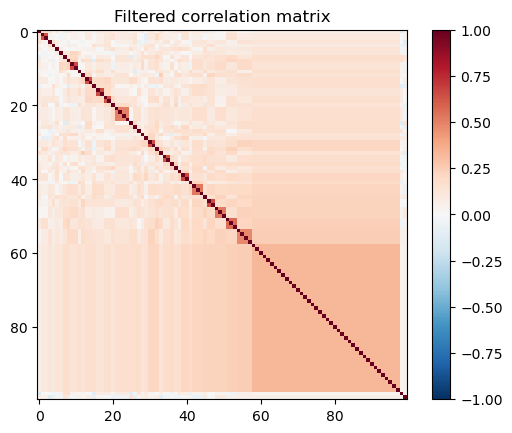

In [8]:
# Clusterize the data
threshold = 0.75
labels = fcluster(avg, threshold, criterion='distance')

# Show the cluster
reg_corr = df.corr()
dic = {}
for i in set(labels):
    dic[i] = np.arange(100)[labels==i]
    
for stock_1 in dic.values():
    for stock_2 in dic.values():
        m = reg_corr.iloc[stock_1,stock_2].mean().mean()
        for i in stock_1:
            for j in stock_2:
                if i!=j:
                    reg_corr.iloc[i,j] = m
        
plt.imshow(reg_corr.iloc[ordered_stocks,ordered_stocks],cmap='RdBu_r',vmin=-1,vmax=1,origin='upper')
plt.colorbar()
plt.title('Filtered correlation matrix')